In [30]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt

data = pd.read_csv('./model_county.csv', encoding='latin1')

In [31]:
warnings.filterwarnings('ignore')
print("Data Dimensionally:" + str(data.shape))

Churn Data Dimensionally:(3107, 9)


In [32]:
FeartureList = data.columns
print("Number of Fearture:" + str(len(FeartureList)))
print("Fearture List: " + str(FeartureList))

Number of Fearture:9
Fearture List: Index(['fips', 'Fall', 'Spring', 'Summer', 'Winter', 'max_warming_season',
       'Annual', 'CTYNAME', 'STNAME'],
      dtype='object')


In [33]:
data.describe()

,fips,Fall,Spring,Summer,Winter,Annual
count,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000
mean,30665.073383,0.541821,0.827684,0.455960,1.414876,0.814849
std,14981.436195,0.535915,0.535592,0.617761,0.713292,0.547305
min,1001.000000,-0.845813,-0.609171,-0.943591,-0.197573,-0.566222
25%,19044.000000,0.152684,0.435069,-0.007203,0.951570,0.400704
50%,29211.000000,0.497030,0.831619,0.344198,1.322314,0.743877
75%,46006.000000,0.899379,1.213799,0.870907,1.802970,1.204774
max,56045.000000,2.526660,2.786215,2.583295,3.736705,2.537160


In [34]:
data.describe(include=['O'])

,max_warming_season,CTYNAME,STNAME
count,3107,3107,3107
unique,4,1842,49
top,Winter,Washington County,Texas
freq,2867,30,254


In [35]:
data.apply(lambda x: len(x.unique()))

fips                  3107
Fall                  3107
Spring                3107
Summer                3107
Winter                3106
max_warming_season       4
Annual                3107
CTYNAME               1842
STNAME                  49
dtype: int64

In [53]:
data = data.copy()
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
#categorical_columns = [x for x in categorical_columns if x not in ['stname', 'ctyname']]
#print(categorical_columns)

for col in categorical_columns:
  print('\n Frequency of Categories for variable %s' %col)
  print(data[col].value_counts())


 Frequency of Categories for variable max_warming_season
max_warming_season
Winter    2867
Spring     107
Summer      99
Fall        34
Name: count, dtype: int64

 Frequency of Categories for variable CTYNAME
CTYNAME
Washington County     30
Jefferson County      25
Franklin County       24
Lincoln County        23
Jackson County        23
                      ..
Niobrara County        1
Natrona County         1
Laramie County         1
Hot Springs County     1
Goshen County          1
Name: count, Length: 1842, dtype: int64

 Frequency of Categories for variable STNAME
STNAME
Texas                   254
Georgia                 159
Virginia                132
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan              

In [55]:
print("List of unique values in state :")
print(data['STNAME'].unique())
print('\n')

print("List of unique values in city :")
print(data['CTYNAME'].unique())
print('\n')

List of unique values in state :
['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


List of unique values in city :
['Autauga County' 'Baldwin County' 'Barbour County' ... 'Uinta County'
 'Washakie County' 'Weston County']




In [40]:
# Define the target variable (what we want to predict)
target_variable = 'annual'

# Select features (explanatory variables)
features = ['fall', 'Spring', 'summer', 'winter', 'max_warming_season', 'ctyname','stname']  # You can adjust this based on your analysis

In [56]:
# Convert categorical features to numerical (if necessary)
data['CTYNAME'] = pd.Categorical(data['CTYNAME']).codes

In [58]:
Df1 = pd.DataFrame(data)
Df1.info()
Df1 = Df1.set_index('STNAME')

#Df1['stname'] = Df1['stname'].astype(str)
Df1.head(1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fips                3107 non-null   int64  
 1   Fall                3107 non-null   float64
 2   Spring              3107 non-null   float64
 3   Summer              3107 non-null   float64
 4   Winter              3107 non-null   float64
 5   max_warming_season  3107 non-null   object 
 6   Annual              3107 non-null   float64
 7   CTYNAME             3107 non-null   int16  
 8   STNAME              3107 non-null   object 
dtypes: float64(5), int16(1), int64(1), object(2)
memory usage: 200.4+ KB


,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,CTYNAME
STNAME,,,,,,,,
Alabama,1001,-0.248564,-0.073735,-0.307132,0.270039,Winter,-0.079968,79
Alabama,1003,0.049693,0.060035,-0.007407,0.444586,Winter,0.142995,86
Alabama,1005,0.179485,0.127492,-0.061220,0.891132,Winter,0.300250,97
Alabama,1007,-0.398166,-0.210074,-0.576085,0.530794,Winter,-0.152667,145
Alabama,1009,0.308868,0.333460,0.169764,0.735788,Winter,0.385534,160
...,...,...,...,...,...,...,...,...
Kentucky,21073,0.392254,0.689806,-0.212713,1.277362,Winter,0.541422,592
Kentucky,21075,-0.320212,0.135788,-0.476557,0.581122,Winter,-0.011640,603
Kentucky,21077,0.463393,0.971302,-0.141630,1.508938,Winter,0.704787,609


In [60]:
pivot_table = pd.pivot_table(Df1, values='Annual', index='STNAME', columns='max_warming_season')
pivot_table.fillna(0, inplace=True)

pivot_table.columns = ['Spring', 'Summer', 'Fall', 'Winter']
print(pivot_table)

                        Spring    Summer      Fall    Winter
STNAME                                                      
Alabama               0.000000  0.000000  0.000000 -0.027473
Arizona               1.766529  1.419363  1.345901  1.016484
Arkansas              0.000000  0.192909  0.000000  0.218986
California            1.356444  1.551115  1.145646  1.275968
Colorado              0.000000  1.023286  1.122867  1.416178
Connecticut           0.000000  0.000000  0.000000  1.802647
Delaware              0.000000  0.000000  0.000000  1.657099
District of Columbia  0.000000  0.000000  0.000000  1.553354
Florida               1.330543  0.000000  0.000000  0.927948
Georgia               0.000000  0.000000  0.000000  0.345629
Idaho                 0.000000  1.294365  0.910767  1.019979
Illinois              0.000000  0.922010  0.000000  0.720526
Indiana               0.000000  0.695429  0.000000  0.701295
Iowa                  0.000000  0.000000  0.000000  0.639727
Kansas                0.

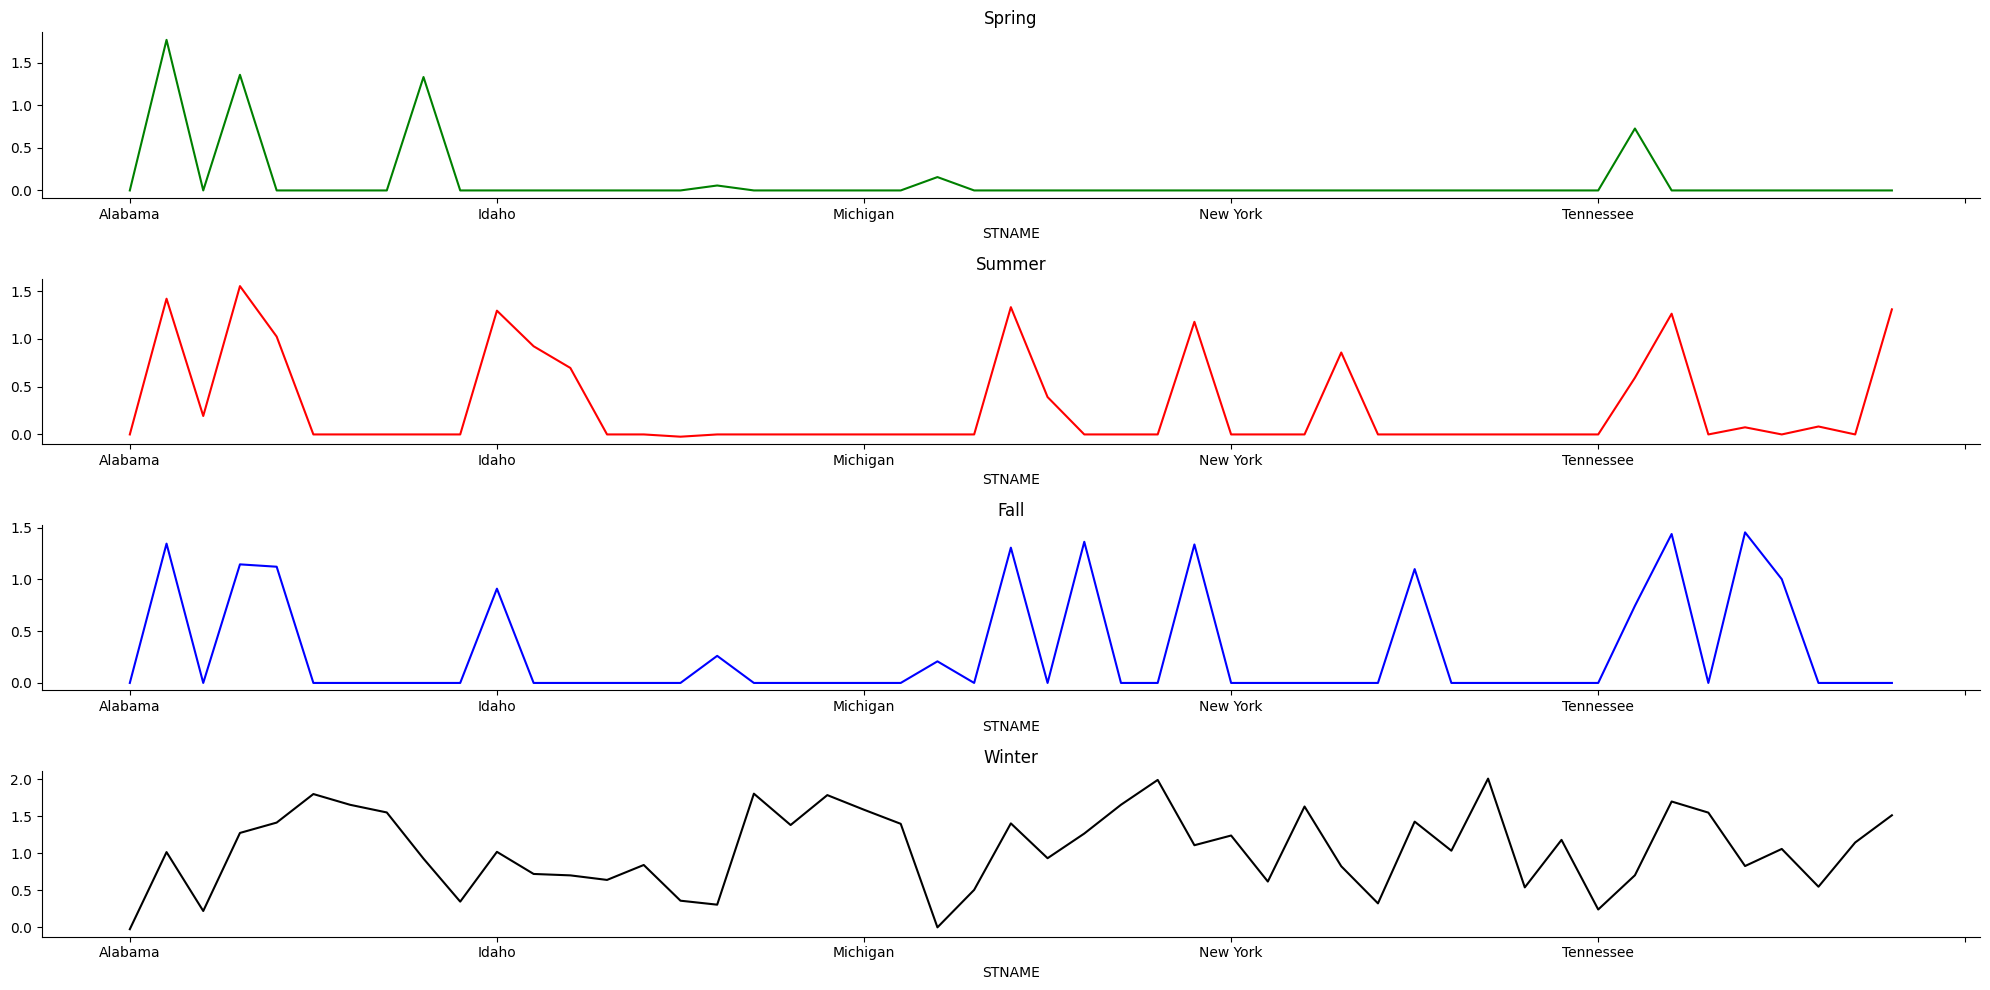

In [66]:
plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
pivot_table['Spring'].plot(kind='line', title='Spring', color = "green")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(4, 1, 2) 
pivot_table['Summer'].plot(kind='line', title='Summer', color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(4, 1, 3) 
pivot_table['Fall'].plot(kind='line', title='Fall', color = "blue")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(4, 1, 4)  
pivot_table['Winter'].plot(kind='line', title='Winter', color = "black")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

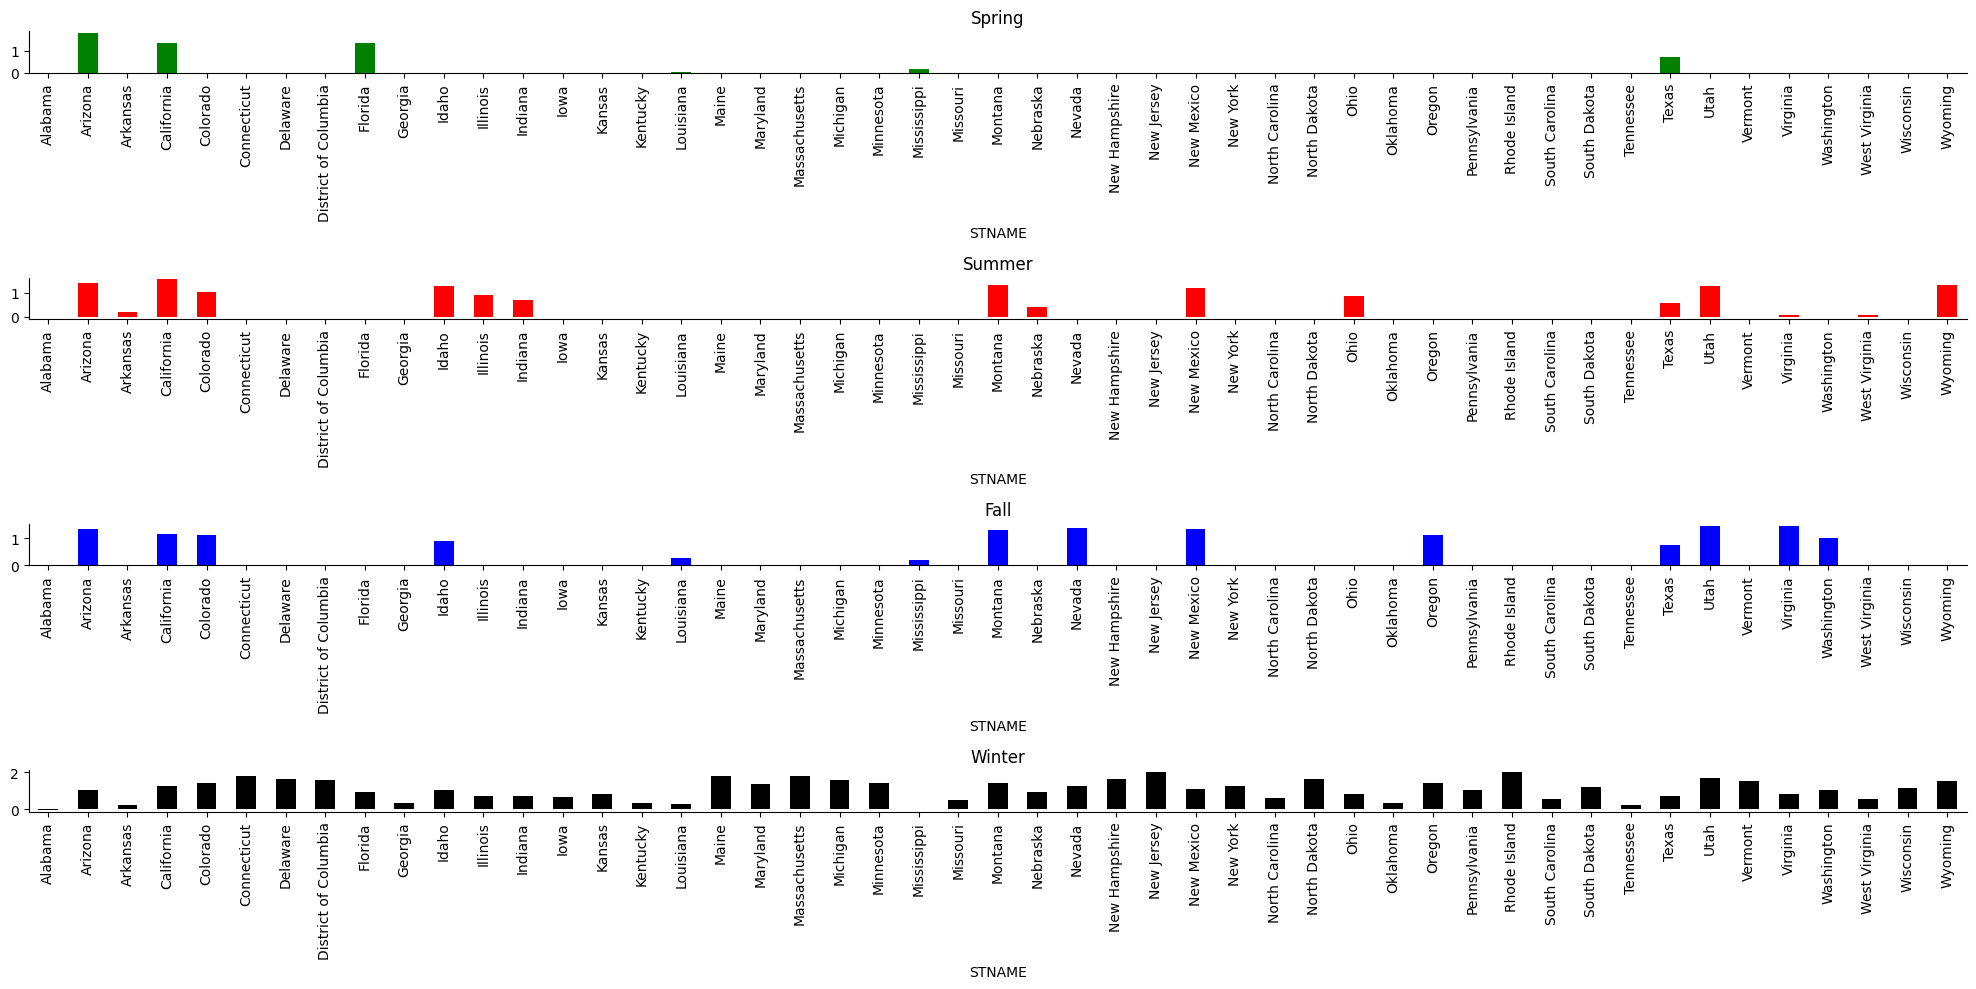

In [63]:
plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
pivot_table['Spring'].plot(kind='bar', title='Spring', color = "green")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(4, 1, 2) 
pivot_table['Summer'].plot(kind='bar', title='Summer', color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(4, 1, 3)  
pivot_table['Fall'].plot(kind='bar', title='Fall', color = "blue")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(4, 1, 4)  
pivot_table['Winter'].plot(kind='bar', title='Winter', color = "black")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

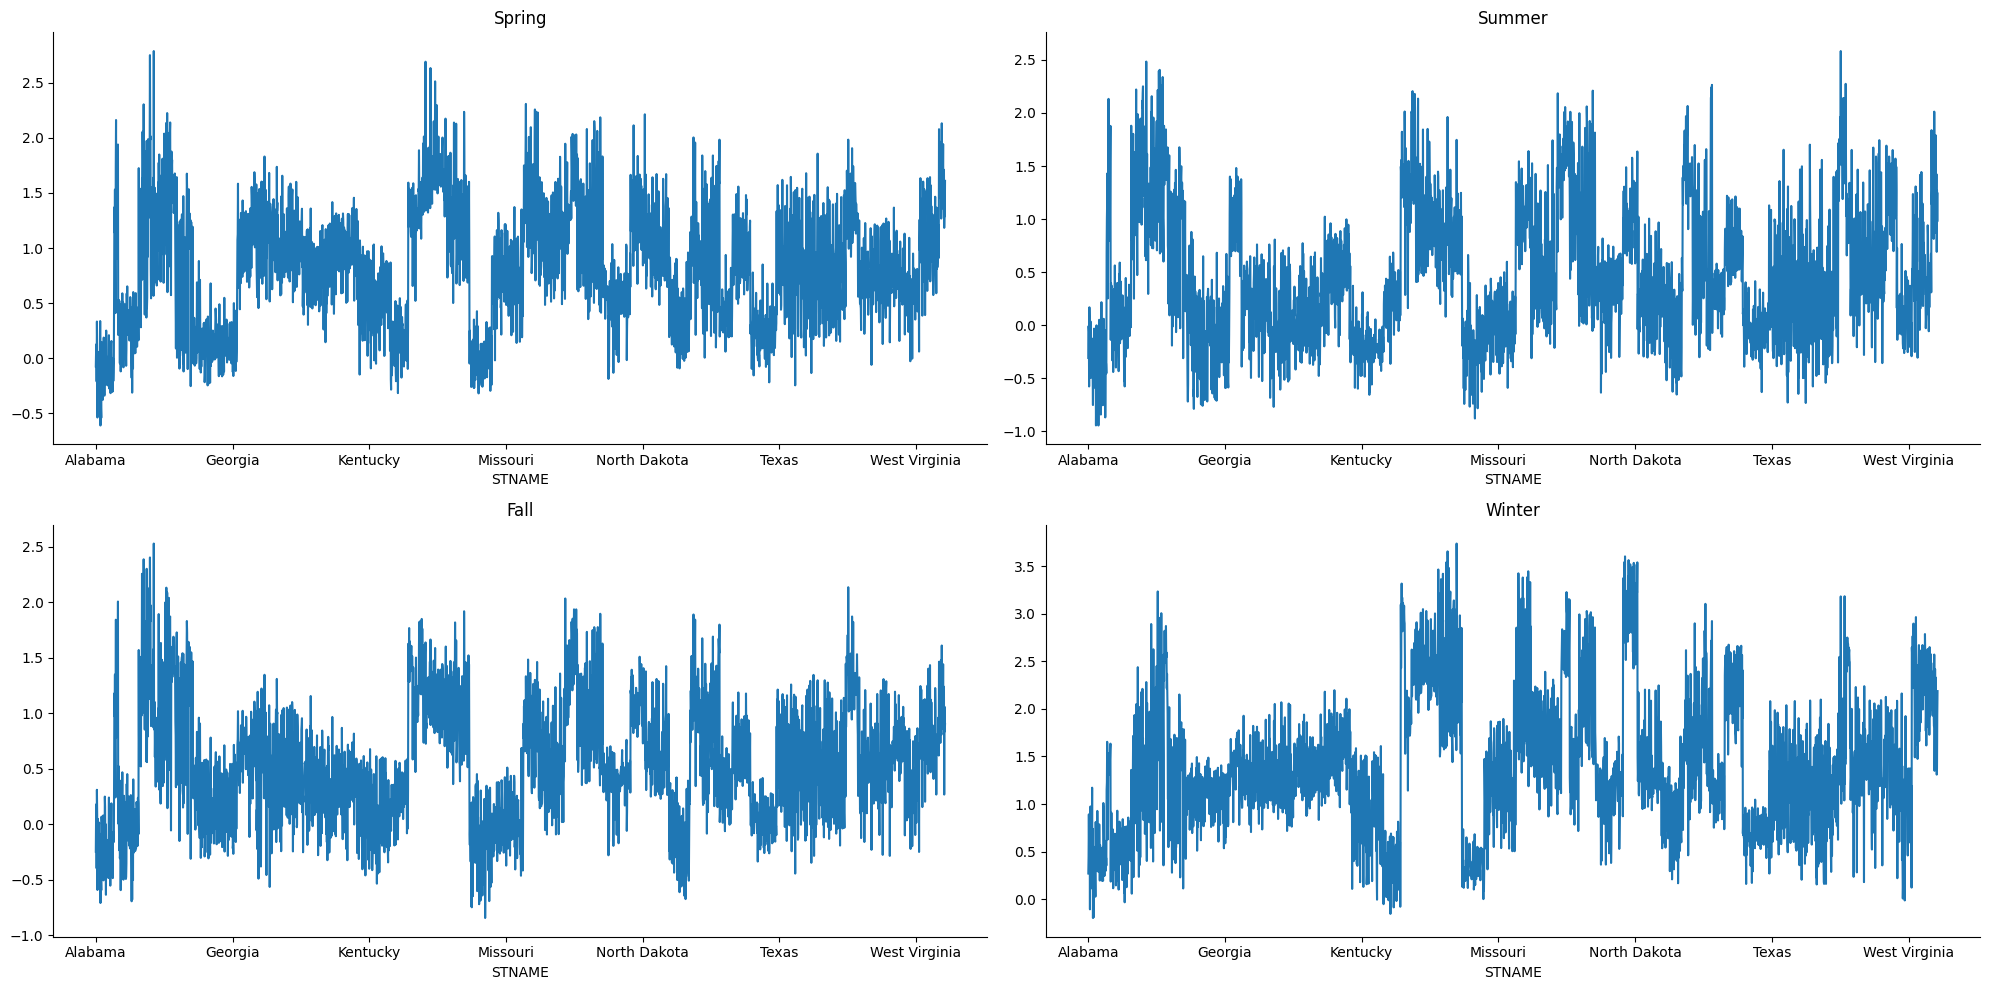

In [65]:
# Title 4 seasons different from annual Line { run: "auto" }
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
Df1['Spring'].plot(kind='line', title='Spring')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 2)  
Df1['Summer'].plot(kind='line', title='Summer')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 3)  
Df1['Fall'].plot(kind='line', title='Fall',)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 4)  
Df1['Winter'].plot(kind='line', title='Winter')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()